In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
abt = pd.read_csv('./abt.csv', sep='|')

In [3]:
abt.head()

,client_id,Target,CreditCard_Premium,CreditCard_Active,CreditCard_CoBranding,Loan_Active,Mortgage_Active,SavingAccount_Active_ARG_Salary,SavingAccount_Active_ARG,SavingAccount_Active_DOLLAR,...,SavingAccount_Credits_Amounts_var,SavingAccount_Debits_Amounts_amin,SavingAccount_Debits_Amounts_amax,SavingAccount_Debits_Amounts_mean,SavingAccount_Debits_Amounts_median,SavingAccount_Debits_Amounts_sum,SavingAccount_Debits_Amounts_count_nonzero,SavingAccount_Debits_Amounts_var,first_product_timedelta,last_product_timedelta
0,5856970,1.0,0,1,0,0,0,0,1,1,...,3.359124e+09,13779.39,157510.79,131985.461667,154910.640,791912.77,6,3.355707e+09,1986,81
1,6371753,0.0,0,0,0,0,0,0,1,1,...,2.667693e+04,3823.12,3982.63,3870.886667,3852.720,23225.32,6,3.415290e+03,1342,303
2,5928737,0.0,0,0,0,0,0,0,1,1,...,0.000000e+00,0.00,0.00,0.000000,0.000,0.00,0,0.000000e+00,943,95
3,475064,0.0,0,1,0,0,0,0,1,0,...,1.102714e+07,2585.28,11160.84,5366.315000,3980.385,32197.89,6,9.876703e+06,1723,487
4,3615172,0.0,0,0,0,0,0,0,1,0,...,0.000000e+00,0.00,0.00,0.000000,0.000,0.00,0,0.000000e+00,460,459


In [67]:
def plot_categorical_data(data_col, target_col = 'Target', _df = abt, key_map=None):
    df = abt.copy()
    groupped = pd.DataFrame(
        df.groupby([data_col])[['client_id']].agg('nunique', np.sum).astype('int64')
    ).reset_index()
    groupped.columns = [data_col, '# of clients']
    
    target = pd.DataFrame(
      df.groupby([data_col])[[target_col]].agg(np.sum).astype('int64')
    ).reset_index()
    target.columns = [data_col, '# of target clients']
    
    merged = groupped.merge(target, how='left')
    merged['target_p'] = (
        (merged['# of target clients'] / merged['# of clients']) * 100
    )
    
    if (key_map != None):
        merged[data_col] = merged[data_col].map(
            lambda x: list(key_map.keys())[list(key_map.values()).index(x)]
        )
    
    # Plot
    merged['# of clients'].plot(kind='bar')
    merged['target_p'].plot(secondary_y=True, color='g')
    
    return merged

In [62]:
def plot_numerical_data(data_col, target_col = 'Target', _df = abt, bins=None, qs = None):
    df = _df.copy()
    if (bins == None):
        df['rank'] = round(df[data_col].rank(pct=True) * 9)
    else:
        df['rank'] = pd.cut(df[data_col], bins)
    if (qs != None):
        df['rank'] = pd.qcut(df[data_col], qs, duplicates='drop')
    rank = pd.DataFrame(
        df.groupby(['rank'])[data_col].agg([np.min, np.max, np.average])
    ).reset_index()

    groupped = pd.DataFrame(
        df.groupby(['rank'])[['client_id']].agg('nunique', np.sum).astype('int64')
    ).reset_index()
    groupped.columns = ['rank', '# of clients']

    target = pd.DataFrame(
        df.groupby(['rank'])[[target_col]].agg(np.sum).astype('int64')
    ).reset_index() 
    target.columns = ['rank', '# of target clients']
    
    merged = rank.merge(groupped, how='left').merge(target, how='left')
    merged['target_p'] = (
        (merged['# of target clients'] / merged['# of clients']) * 100
    )
    
    # Plot
    merged['# of clients'].plot(kind='bar')
    merged['target_p'].plot(secondary_y=True, color='g')
    
    return merged

# Plots

### Credit Cards

,CreditCard_Active,# of clients,# of target clients,target_p
0,0,8430,516,6.120996
1,1,17576,6313,35.918298


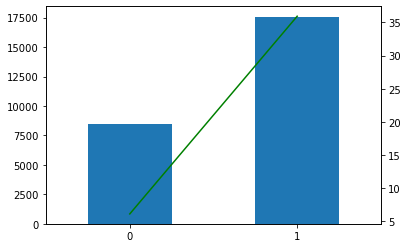

In [6]:
## Credit card active
plot_categorical_data('CreditCard_Active')

,credit_card_product_ordinal,# of clients,# of target clients,target_p
0,1,8430,516,6.120996
1,2,404,138,34.158416
2,3,8283,3885,46.903296
3,4,365,0,0.000000
4,5,2430,15,0.617284
5,6,5785,2132,36.853933
6,7,251,107,42.629482
7,8,58,36,62.068966


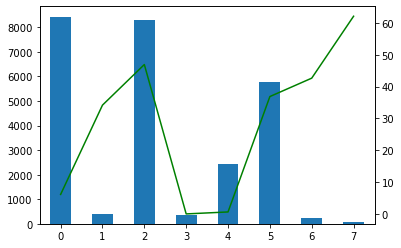

In [7]:
## Credit card product
plot_categorical_data('credit_card_product_ordinal')

,rank,amin,amax,average,# of clients,# of target clients,target_p
0,0.0,-16989.63,-158.00,-2670.686364,11,4,36.363636
1,1.0,0.00,0.00,0.000000,8641,673,7.788450
2,3.0,1.21,3964.63,1935.518214,1461,284,19.438741
3,4.0,3966.36,12201.57,8055.685637,2890,782,27.058824
4,5.0,12207.53,20398.01,16209.986570,2889,964,33.367947
5,6.0,20405.70,30765.77,25301.724740,2890,1039,35.951557
6,7.0,30767.02,47147.56,38251.733652,2889,1156,40.013846
7,8.0,47149.01,88320.56,63151.386536,2890,1229,42.525952
8,9.0,88333.75,716209.60,140107.983073,1445,698,48.304498


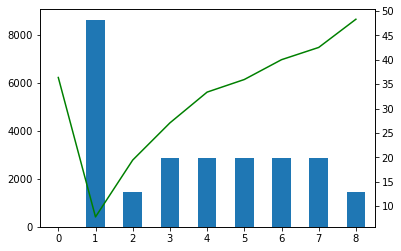

In [8]:
## CreditCard_Total_Spending
plot_numerical_data('CreditCard_Total_Spending')

,rank,amin,amax,average,# of clients,# of target clients,target_p
0,"(-0.1, 0.1]",0.00,0.0,0.000000,8641,673,7.78845
1,"(0.1, inf]",1.21,716209.6,36967.509534,17354,6152,35.45004


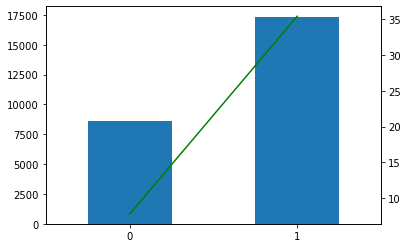

In [9]:
## CreditCard_Total_Spending
plot_numerical_data('CreditCard_Total_Spending', bins=[-0.1, 0.1, np.infty])

### Saving Account

,rank,amin,amax,average,# of clients,# of target clients,target_p
0,1.0,0.0,0.0,0.000000,6832,575,8.416276
1,3.0,1.0,2.0,1.409767,3092,448,14.489004
2,4.0,3.0,5.0,3.953586,2844,579,20.358650
3,5.0,6.0,8.0,6.847110,2976,790,26.545699
4,6.0,9.0,14.0,11.135871,3047,1023,33.574007
5,7.0,15.0,27.0,20.066018,2878,1127,39.159138
6,8.0,28.0,67.0,43.211955,2911,1434,49.261422
7,9.0,68.0,401.0,100.978962,1426,853,59.817672


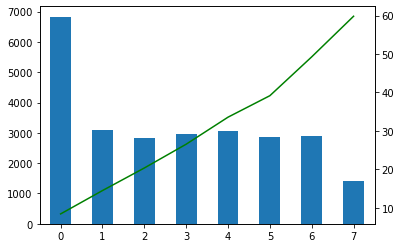

In [49]:
plot_numerical_data('n_operations')

,rank,amin,amax,average,# of clients,# of target clients,target_p
0,4.0,0.000,0.00,0.000000,23959,5551,23.168747
1,8.0,0.005,17909.68,10493.581470,602,272,45.182724
2,9.0,17922.000,230306.50,37043.200474,1445,1006,69.619377


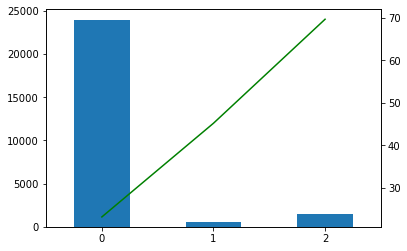

In [14]:
plot_numerical_data('SavingAccount_Salary_Payment_Amount_median')

,rank,amin,amax,average,# of clients,# of target clients,target_p
0,"(-0.1, 0.1]",0.00,0.02,0.000001,21458,4597,21.423245
1,"(0.1, 20000.0]",1.00,20000.00,6181.172119,2647,1123,42.425387
2,"(20000.0, inf]",20025.93,1124455.15,63897.059385,1901,1109,58.337717


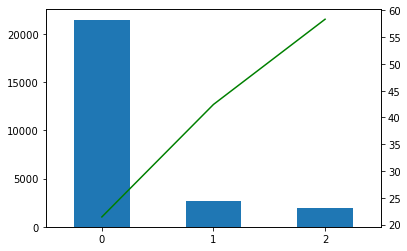

In [40]:
plot_numerical_data('SavingAccount_DebitCard_Spend_Amount', bins=[-0.1, 0.1, 20000, np.infty])


,rank,amin,amax,average,# of clients,# of target clients,target_p
0,"(-0.001, 12293.149]",0.00,12290.445,1572.548235,19504,3727,19.108901
1,"(12293.149, 7854004.78]",12294.05,7854004.780,99294.951649,6502,3102,47.708397


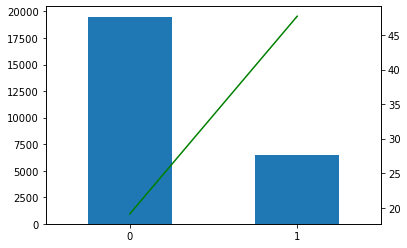

In [43]:
plot_numerical_data('SavingAccount_Total_Amount_median', qs=4)

## Demographics

In [51]:
region_map = {
    'BUENOS AIRES':  1,
    'REGION CENTRO': 2,
    'REGION NORTE GRANDE ARGENTINO': 3,
    'REGION PATAGONICA': 4,
    'CABA Centro/Norte': 5,
    'REGION CUYO': 6, 
    'AMBA Resto': 7,
    'NO REGION': 8
}
sex_map = {
    'F': 1,
    'M': 2,
}
age_map = {
    'Entre 18 y 29 años': 1,
    'Entre 30 y 39 años': 2,
    'Entre 40 y 49 años': 3,
    'Entre 50 y 59 años': 4,
    'Entre 60 y 64 años': 5,
    'Entre 65 y 69 años': 6,
    'Mayor a 70 años': 7
}

,region_ordinal,# of clients,# of target clients,target_p
0,BUENOS AIRES,6991,2138,30.582177
1,REGION CENTRO,5768,1116,19.348128
2,REGION NORTE GRANDE ARGENTINO,4966,1059,21.325010
3,REGION PATAGONICA,2437,821,33.688962
4,CABA Centro/Norte,2050,613,29.902439
5,REGION CUYO,1960,490,25.000000
6,AMBA Resto,1828,592,32.385120
7,NO REGION,6,0,0.000000


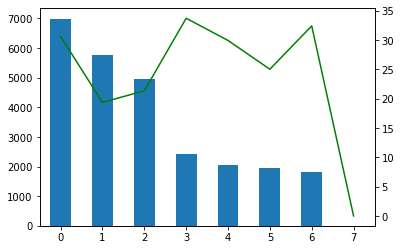

In [68]:
plot_categorical_data('region_ordinal', key_map=region_map)

,client_age_group_ordinal,# of clients,# of target clients,target_p
0,Entre 18 y 29 años,1125,249,22.133333
1,Entre 30 y 39 años,5875,1215,20.680851
2,Entre 40 y 49 años,7265,1662,22.876807
3,Entre 50 y 59 años,5740,1798,31.324042
4,Entre 60 y 64 años,2408,776,32.225914
5,Entre 65 y 69 años,1991,694,34.856856
6,Mayor a 70 años,1602,435,27.153558


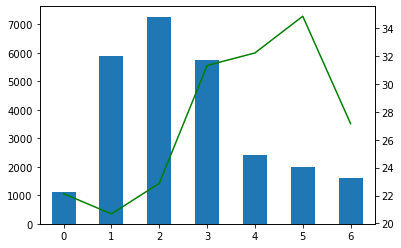

In [70]:
plot_categorical_data('client_age_group_ordinal', key_map=age_map)

,sex_ordinal,# of clients,# of target clients,target_p
0,F,11171,2847,25.485632
1,M,14835,3982,26.841928


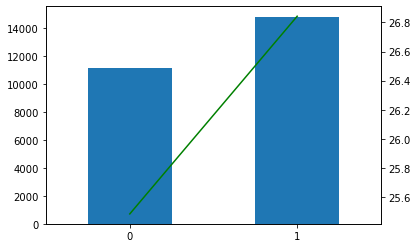

In [72]:
plot_categorical_data('sex_ordinal', key_map=sex_map)

,Email,# of clients,# of target clients,target_p
0,0,7512,1747,23.256124
1,1,18494,5082,27.479182


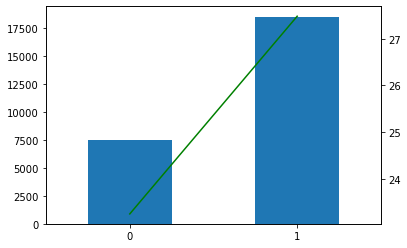

In [74]:
plot_categorical_data('Email')

,Mobile,# of clients,# of target clients,target_p
0,0,3078,647,21.020143
1,1,22928,6182,26.962666


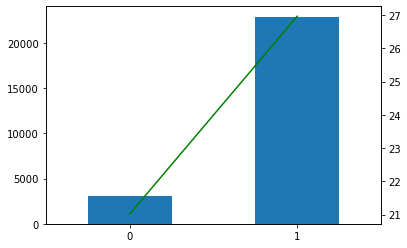

In [75]:
plot_categorical_data('Mobile')